In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import os, sys
import pathlib
import glob
from keras import models
from keras.layers import Dense, Dropout, Input
from keras.models import Model, Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras.preprocessing.image as kpi
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.utils import to_categorical, plot_model
from PIL import Image

print('Hi')


Hi


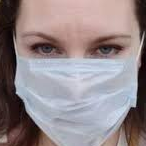

In [2]:
from IPython.display import display
from IPython.display import Image as _Imgdis

def show(path):
    display(_Imgdis(filename=path, width=240, height=320))
    
show('../input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/1025.png')



Found 992 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


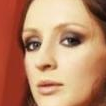

In [3]:
# create a data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
)

# load and iterate training dataset
train_it = train_datagen.flow_from_directory('../input/face-mask-12k-images-dataset/Face Mask Dataset/Test', 
                                       target_size = (150, 150), class_mode='binary', batch_size=32)
# load and iterate validation dataset
val_it = test_datagen.flow_from_directory('../input/face-mask-12k-images-dataset/Face Mask Dataset/Train', 
                                     target_size = (150, 150),class_mode='binary', batch_size=32)
# load and iterate test dataset
test_it = test_datagen.flow_from_directory('../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation', 
                                      target_size = (150, 150), class_mode='binary', batch_size=32)

kpi.load_img(
    '../input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/100.png', grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest"
)


In [4]:
data = []
labels = []

path = "../input/face-mask-12k-images-dataset/Face Mask Dataset/Train"
for status in os.listdir(path):
    for image in glob.glob(path+"/"+status+"/"+"*.png"):
        img=load_img(image,target_size=(64,64))
        x = img_to_array(img)
        data.append(x)
        if status == "WithMask":
            labels.append(1)
        else:
            labels.append(0)


path2 = "../input/face-mask-12k-images-dataset/Face Mask Dataset/Test"
for status in os.listdir(path2):
    for image in glob.glob(path2+"/"+status+"/"+"*.png"):
        img=load_img(image,target_size=(64,64))
        x=img_to_array(img)
        data.append(x)
        if status == "WithMask":
            labels.append(1)
        else:
            labels.append(0)
 
#data includes 10000 train + 992 test images
            
X_val = []
y_val = []

path3 = "../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation"
for status in os.listdir(path3):
    for image in glob.glob(path3+"/"+status+"/"+"*.png"):
        img=load_img(image,target_size=(64,64))
        x=img_to_array(img)
        X_val.append(x)
        if status == "WithMask":
            y_val.append(1)
        else:
            y_val.append(0)

In [5]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

X_val= np.array(X_val, dtype="float32")
y_val = np.array(y_val)

labels = to_categorical(labels)
print (labels[4999])
print (labels[5000])
print (labels[9999])
print (labels[10000])


[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]


In [6]:
y_val = to_categorical(y_val)
print(y_val[0])

[1. 0.]


In [7]:
X_train, X_test = data[:10000], data[10001:]
y_train, y_test = labels[:10000], labels[10001:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

print(X_train[0].shape)

(10000, 64, 64, 3) (10000, 2) (991, 64, 64, 3) (991, 2) (800, 64, 64, 3) (800, 2)
(64, 64, 3)


In [8]:

NUM_ROWS=64
NUM_COLS=64
NUM_CLASSES=2
BATCH_SIZE=32
EPOCHS=10

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_val = X_val.astype('float32')/255

In [9]:
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from keras.layers import Flatten

model = Sequential([
    Conv2D(200,3, activation='relu', input_shape=(64,64,3)),
  
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    
    Dropout(0.5),
    
    Dense(50, activation='relu'),
    
    Dense(2,activation='softmax')  # activation change
])

#     Conv2D(100,3, activation='relu', input_shape=(64,64,3)),
#     MaxPooling2D(pool_size=(2, 2)),


In [10]:
model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train,
            batch_size= BATCH_SIZE,
            epochs= EPOCHS,
            validation_data=(X_val, y_val),
            verbose=1)

         

score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
313/313 [==============================] - 10s 18ms/step - loss: 0.3990 - accuracy: 0.8862 - val_loss: 0.0359 - val_accuracy: 0.9900
Epoch 2/10
313/313 [==============================] - 5s 15ms/step - loss: 0.0471 - accuracy: 0.9840 - val_loss: 0.0316 - val_accuracy: 0.9900
Epoch 3/10
313/313 [==============================] - 5s 15ms/step - loss: 0.0323 - accuracy: 0.9883 - val_loss: 0.1181 - val_accuracy: 0.9550
Epoch 4/10
313/313 [==============================] - 5s 16ms/step - loss: 0.0279 - accuracy: 0.9899 - val_loss: 0.0308 - val_accuracy: 0.9925
Epoch 5/10
313/313 [==============================] - 5s 15ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0739 - val_accuracy: 0.9775
Epoch 6/10
313/313 [==============================] - 5s 15ms/step - loss: 0.0178 - accuracy: 0.9930 - val_loss: 0.0242 - val_accuracy: 0.9912
Epoch 7/10
313/313 [==============================] - 5s 15ms/step - loss: 0.0306 - accuracy: 0.9886 - val_loss: 0.0256 - val_accuracy: 0.988

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 200)       5600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 200)       0         
_________________________________________________________________
flatten (Flatten)            (None, 192200)            0         
_________________________________________________________________
dropout (Dropout)            (None, 192200)            0         
_________________________________________________________________
dense (Dense)                (None, 50)                9610050   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 102       
Total params: 9,615,752
Trainable params: 9,615,752
Non-trainable params: 0
______________________________________________

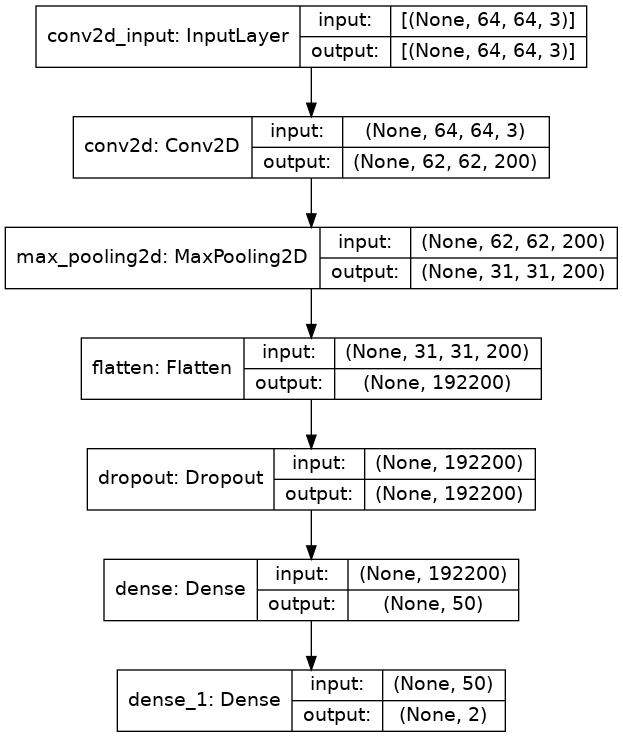

In [11]:
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot
# SVG(model_to_dot(model).create(prog='dot', format='svg'))

Mask


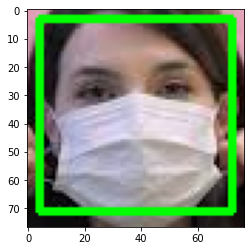

In [20]:
def prediction(im):
    im = cv2.resize(im, (64,64))
    im = np.reshape(im, (1,64,64,3))
    im = im/255.0
    result = model.predict(im)
#     print(result)
    result = np.argmax(result, axis=1)[0]
#     print(result)
    
    if (result):
        print('Mask')
    else:
        print('No Mask')
    return result
    
ab= '../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithMask/1374.png'
img = cv2.imread(ab, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# c = prediction(img)
# plt.imshow(img)

color_dict={0:(255,0,0),1:(0,255,0)}

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') #faces.xml
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.05, minNeighbors=5)

for x, y, w, h in faces:
    im2 = img[y:y+h, x:x+w]
    p = prediction(im2)
    img = cv2.rectangle(img, (x,y), (x+w, y+h), color_dict[p], 2)
plt.imshow(img)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
def reports (X_test,y_test):
    Y_pred = model.predict(X_test)
    y_pred = np.argmax(Y_pred, axis=1)
    target_names = ['Mask', 'No mask']

    
    classification = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names)
    confusion = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    score = model.evaluate(X_test, y_test, batch_size=32)
    Test_Loss =  score[0]*100
    Test_accuracy = score[1]*100
    
    return classification, confusion, Test_Loss, Test_accuracy

In [14]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])
classification, confusion, Test_loss, Test_accuracy = reports(X_test,y_test)
classification = str(classification)
confusion = str(confusion)
print(format(classification))
print(format(confusion))

Test loss: 0.0855264887213707
Test accuracy: 0.975782036781311
31/31 [==============================] - 0s 10ms/step - loss: 0.0855 - accuracy: 0.9758
              precision    recall  f1-score   support

        Mask       0.96      1.00      0.98       508
     No mask       1.00      0.95      0.97       483

    accuracy                           0.98       991
   macro avg       0.98      0.98      0.98       991
weighted avg       0.98      0.98      0.98       991

[[506   2]
 [ 22 461]]
